Speeches Text Analytics

In [ ]:
## Importing the necessary libraries along with the standard import

import numpy as np
import pandas as pd
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Python/Project_Speech.xlsx"
Speech = pd.read_excel(path)

In [ ]:
Speech.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [ ]:
len(Speech)

3

Extracting the word count

In [ ]:
## Let's get a word count without writing a lambda function

Speech['Totalwords'] = [len(x.split()) for x in Speech['Speech'].tolist()]
Speech[['Speech','Totalwords']]

,Speech,Totalwords
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [ ]:
Speech['word_count'] = Speech['Speech'].apply(lambda x: len(str(x).split(" ")))
Speech[['Speech','word_count']]

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


**Counting number of characters**

In [ ]:
Speech['char_count'] = Speech['Speech'].str.len()
Speech[['Speech','char_count']]

,Speech,char_count
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


**Average Word length**

In [ ]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average length of words in the each of the entries
Speech['avg_word'] = Speech['Speech'].apply(lambda x: avg_word(x))
Speech[['Speech','avg_word']]

,Speech,avg_word
0,On each national day of inauguration since 178...,4.783825
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397


**Count of Stop Words**

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

Speech['stopwords'] = Speech['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
Speech[['Speech','stopwords']]

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


**Count of Special characters**

In [ ]:
Speech['hastags'] = Speech['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Speech[['Speech','hastags']]

,Speech,hastags
0,On each national day of inauguration since 178...,0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


In [ ]:
Speech['at_the_rate'] = Speech['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
Speech[['Speech','at_the_rate']]

,Speech,at_the_rate
0,On each national day of inauguration since 178...,0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


**Count of Numbers**

In [ ]:
Speech['numerics'] = Speech['Speech'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Speech[['Speech','numerics']]

,Speech,numerics
0,On each national day of inauguration since 178...,14
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10


**Count of Uppercase Words**

In [ ]:
Speech['UpperCase'] = Speech['Speech'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Speech[['Speech','UpperCase']]

,Speech,UpperCase
0,On each national day of inauguration since 178...,1
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",13


**Count of Uppercase Letters**

In [ ]:
Speech['upper_letter'] = Speech['Speech'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
Speech[['Speech','upper_letter']]

,Speech,upper_letter
0,On each national day of inauguration since 178...,119
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",94
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",132


**Converting in to Lower Case**

In [ ]:
Speech['Speech'] = Speech['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Speech['Speech']

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

**Removal of Punctuation**

In [ ]:
Speech['Speech'] = Speech['Speech'].str.replace('[^\w\s]','')
Speech['Speech']

<ipython-input-23-0d8bd5b347b8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Speech['Speech'] = Speech['Speech'].str.replace('[^\w\s]','')


0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

**Removal of StopWords**

In [ ]:
stop = stopwords.words('english')
Speech['Speech'] = Speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Speech['Speech']

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

**Top three words of each president**

In [ ]:
all_words=[i for i in ' '.join(Speech['Speech']).split()]

In [ ]:
words=pd.DataFrame(data=all_words, columns=['words'])

In [ ]:
words.value_counts().head(10)

words     
us            45
new           26
let           25
america       20
peace         19
nation        19
world         18
nations       14
government    13
know          13
dtype: int64

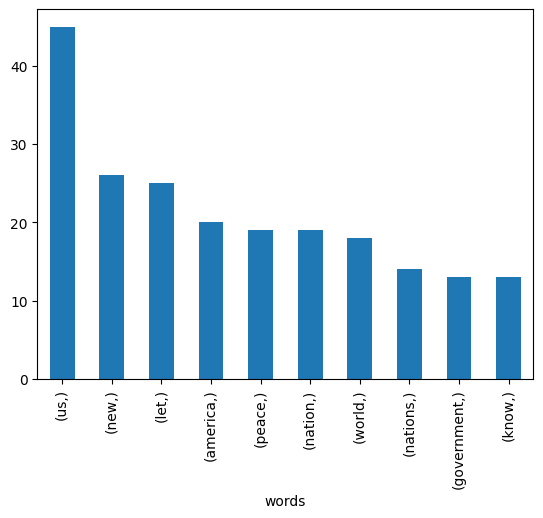

In [ ]:
words.value_counts().head(10).plot.bar()
plt.show()

**Word Cloud**

In [ ]:
corpus = Speech['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in Speech]))
corpus

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [ ]:
wc_a = ' '.join(corpus)

Word Cloud for Speech (after cleaning)!!


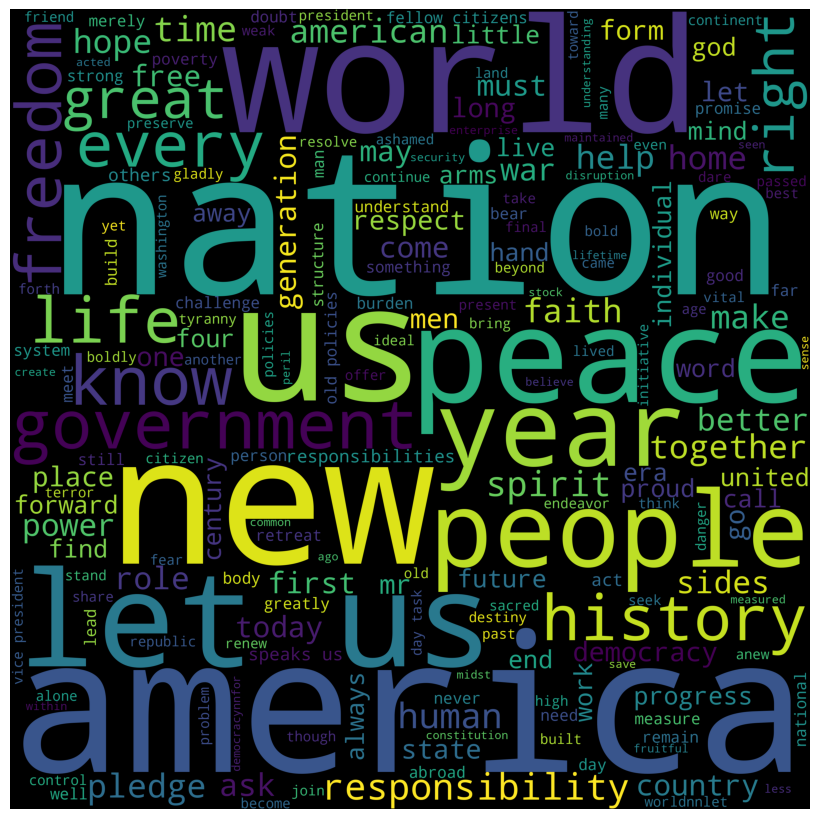

In [ ]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(wc_a)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

print("Word Cloud for Speech (after cleaning)!!")
plt.show()